In [5]:
import mplfinance as mpf
import yfinance as yf
import pandas as pd

[*********************100%***********************]  1 of 1 completed


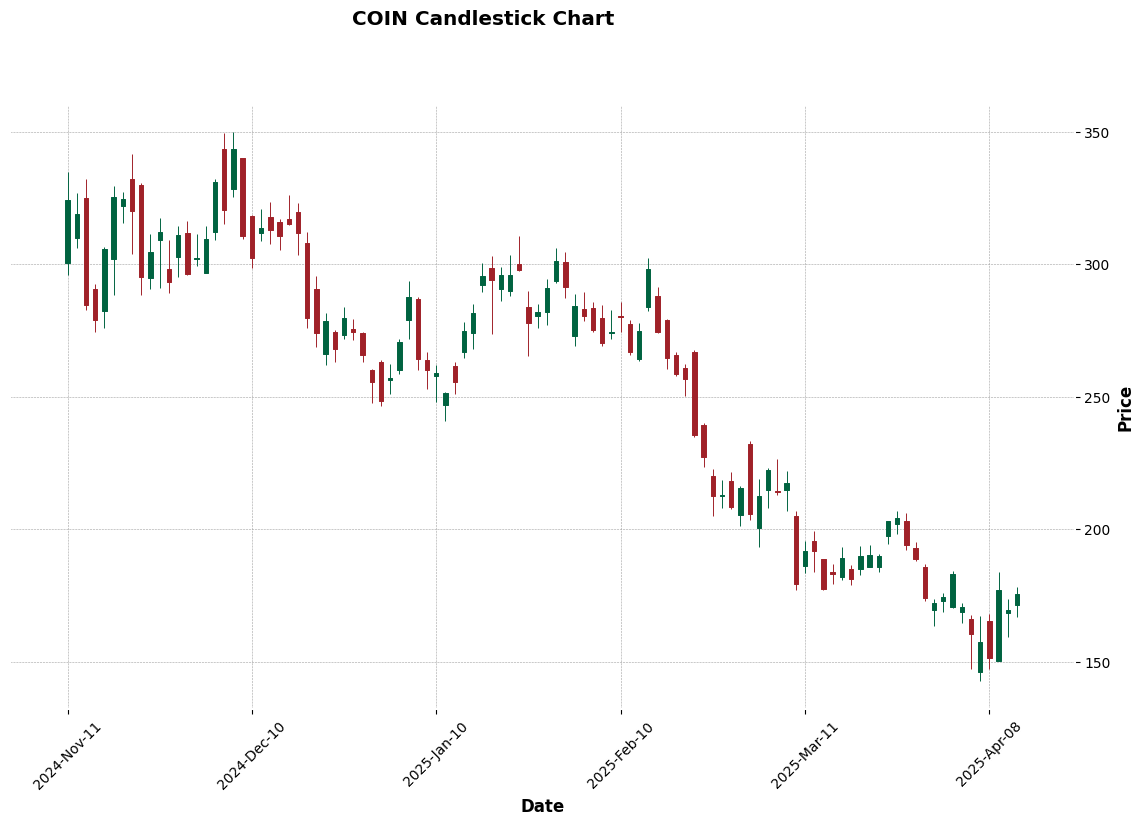

In [17]:
# Pedir el ticker
ticker = input("Enter the stock name: ").strip().upper()

# Descargar datos (con formato multicolumna)
df = yf.download(ticker, start='2024-11-10', end='2025-04-12', group_by='ticker')

# Si el DataFrame tiene columnas multinivel, aplanamos
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.droplevel(0)  # Nos quedamos solo con el segundo nivel

# Limpiamos los nombres de las columnas por si tienen espacios u otros caracteres
df.columns = [col.strip().capitalize() for col in df.columns]

# Filtrar y asegurar el orden correcto de columnas
columnas_requeridas = ['Open', 'High', 'Low', 'Close', 'Volume']
df = df[[col for col in columnas_requeridas if col in df.columns]]

# Revisamos si falta alguna columna
faltantes = set(columnas_requeridas) - set(df.columns)
if faltantes:
    raise ValueError(f"Faltan columnas necesarias para graficar: {faltantes}")

# Convertimos todas las columnas a tipo float (menos problemas con mplfinance)
df = df.astype(float)

# Aseguramos que el índice sea datetime
df.index = pd.to_datetime(df.index)

# Mostrar gráfico
mpf.plot(df, type='candle', style='charles',
         title=f'{ticker} Candlestick Chart', ylabel='Price', xlabel='Date',
         figratio=(12,7), figscale=1.5)  #figratio proporción (ancho, alto) # figscaleescala total (más grande aún)